# Importar Librerias

In [45]:
import pandas as pd
import re
from numpy import mean
from numpy import median
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sn

#
from warnings import catch_warnings
from warnings import filterwarnings

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Si el computador tiene procesadores múltiples, se aprovecharán
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed



# Carga de Datos

In [6]:
df = pd.read_csv('./train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# 3) Limpieza y Procesamiento de datos

In [18]:
tweets = list(df.iloc[:,3])

#Lista de caracteres que se repiten
disallowed_characters = "._!:@#'=><?()|_-/[]*~;"

#Lista de stopwords, etiquetas HTML y combinaciones de \x89 que deben ser removidas
disallowed_lit = ['our ', ' our ', ' of ', ' by ', ' there ', ' the ', ' and ', ' to ', '\n', '&amp', ' for ', ' nor ', 'yet', ' so ', ' but ', ' if ', 'if ', '&gt', '&lt', 'when', 'whenever', 'where', 'wherever', "while", ' for ', 'because', 'before', '\x89ûò', '\x89ûª', '\x89ûï', '\x89û÷', '\x89û', '\x89ã¢', '\x9d', '\x89ââ', '\x89ûó', '+']

for i in range(len(tweets)):
    
    #Cambiar todas las letras a minusculas
    tweets[i] = tweets[i].lower()
    
    #Eliminar links
    tweets[i] = re.sub('http://\S+|https://\S+', '', tweets[i])
    
    #Eliminar caracteres especiales
    for character in disallowed_characters:
        tweets[i] = tweets[i].replace(character, "")
    
    #Eliminar articulos, preposiciones y etiquetas HTML
    for character in disallowed_lit:
        tweets[i] = tweets[i].replace(character, " ")
    
    #Eliminar espacios que tienen tamaño superior a 1
    tweets[i] = re.sub("\s+" , " ", tweets[i])

#print(tweets)

df['cleaned_text'] = tweets

In [19]:
df.head()

,id,keyword,location,text,target,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds are reason this earthquake may allah fo...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked shelter in place are being...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfires evacuation ord..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


# 4) Obtenga la frecuencia de las palabras tanto de los tweets de desastres como de los que no. 

In [33]:
# Función para encontrar frecuencia de palabras
def freq(str):
    palabra = []
    cantidad = []
 
    # Separamos el string en una lista de palabras
    str = str.split()        
    str2 = []
 
    # Iteramos en la lista, hasta el último valor
    for i in str:            
 
        # Chequeamos que exista más de una palabra
        if i not in str2:
 
            # Insertamos el valor el la lista
            str2.append(i)
             
    for i in range(0, len(str2)):
        
        palabra.append(str2[i])
        cantidad.append(int(str.count(str2[i])))
                        
        # Contamos la frecuencia de cada palabra presente en str2 y mostramos
        print('La frecuencia de: ', str2[i], 'es :', str.count(str2[i]))
        
    return palabra, cantidad

In [34]:
texto = ""
for text in tweets:
    texto += text + " " 
    
palabra, cantidad = freq(texto)

La frecuencia de:  deeds es : 2
La frecuencia de:  are es : 402
La frecuencia de:  reason es : 20
La frecuencia de:  this es : 479
La frecuencia de:  earthquake es : 50
La frecuencia de:  may es : 88
La frecuencia de:  allah es : 9
La frecuencia de:  forgive es : 2
La frecuencia de:  us es : 164
La frecuencia de:  all es : 258
La frecuencia de:  forest es : 65
La frecuencia de:  fire es : 252
La frecuencia de:  near es : 54
La frecuencia de:  la es : 26
La frecuencia de:  ronge es : 1
La frecuencia de:  sask es : 1
La frecuencia de:  canada es : 11
La frecuencia de:  residents es : 8
La frecuencia de:  asked es : 9
La frecuencia de:  shelter es : 6
La frecuencia de:  in es : 1979
La frecuencia de:  place es : 26
La frecuencia de:  being es : 90
La frecuencia de:  notified es : 1
La frecuencia de:  officers es : 8
La frecuencia de:  no es : 255
La frecuencia de:  other es : 38
La frecuencia de:  evacuation es : 50
La frecuencia de:  or es : 204
La frecuencia de:  orders es : 11
La frecu

La frecuencia de:  hotel es : 6
La frecuencia de:  gained es : 6
La frecuencia de:  3 es : 104
La frecuencia de:  followers es : 8
La frecuencia de:  know es : 112
La frecuencia de:  y es : 297
La frecuencia de:  stats es : 3
La frecuencia de:  grow es : 8
La frecuencia de:  how es : 191
La frecuencia de:  west es : 25
La frecuencia de:  burned es : 39
La frecuencia de:  thousands es : 19
La frecuencia de:  alone es : 19
La frecuencia de:  perfect es : 10
La frecuencia de:  tracklist es : 1
La frecuencia de:  life es : 87
La frecuencia de:  leave es : 28
La frecuencia de:  first es : 108
La frecuencia de:  retainers es : 1
La frecuencia de:  its es : 267
La frecuencia de:  quite es : 10
La frecuencia de:  weird es : 9
La frecuencia de:  better es : 36
La frecuencia de:  get es : 229
La frecuencia de:  used es : 30
La frecuencia de:  have es : 386
La frecuencia de:  wear es : 3
La frecuencia de:  them es : 113
La frecuencia de:  every es : 68
La frecuencia de:  single es : 11
La frecuen

La frecuencia de:  tell es : 25
La frecuencia de:  him es : 69
La frecuencia de:  another es : 69
La frecuencia de:  truckcrash es : 1
La frecuencia de:  overturns es : 1
La frecuencia de:  fortworth es : 1
La frecuencia de:  interstate es : 2
La frecuencia de:  click es : 6
La frecuencia de:  youve es : 7
La frecuencia de:  been es : 191
La frecuencia de:  ashville es : 1
La frecuencia de:  23 es : 4
La frecuencia de:  sb es : 3
La frecuencia de:  sr es : 2
La frecuencia de:  752 es : 1
La frecuencia de:  carolina es : 1
La frecuencia de:  motorcyclist es : 9
La frecuencia de:  dies es : 14
La frecuencia de:  i540 es : 1
La frecuencia de:  crossed es : 6
La frecuencia de:  median es : 1
La frecuencia de:  motorcycle es : 5
La frecuencia de:  rider es : 5
La frecuencia de:  traveling es : 2
La frecuencia de:  fyi es : 3
La frecuencia de:  cadfyi es : 2
La frecuencia de:  property es : 18
La frecuencia de:  damagenhs999 es : 1
La frecuencia de:  piner es : 2
La frecuencia de:  rdhorndal

La frecuencia de:  want es : 80
La frecuencia de:  making es : 29
La frecuencia de:  say es : 86
La frecuencia de:  cannot es : 11
La frecuencia de:  done es : 29
La frecuencia de:  should es : 68
La frecuencia de:  interrupt es : 1
La frecuencia de:  those es : 68
La frecuencia de:  george es : 6
La frecuencia de:  bernard es : 1
La frecuencia de:  shaw es : 2
La frecuencia de:  oyster es : 1
La frecuencia de:  shell es : 4
La frecuencia de:  andrew es : 2
La frecuencia de:  carnegie es : 1
La frecuencia de:  anyone es : 24
La frecuencia de:  need es : 72
La frecuencia de:  pu es : 1
La frecuencia de:  play es : 26
La frecuencia de:  hybrid es : 3
La frecuencia de:  slayer es : 3
La frecuencia de:  ps4 es : 2
La frecuencia de:  eu es : 3
La frecuencia de:  hmu es : 2
La frecuencia de:  cod8sandscrims es : 1
La frecuencia de:  empirikgaming es : 1
La frecuencia de:  codawscrims es : 1
La frecuencia de:  4tpkotc es : 1
La frecuencia de:  4tpfa es : 1
La frecuencia de:  aftershockorg es 

La frecuencia de:  shall es : 10
La frecuencia de:  petebests es : 1
La frecuencia de:  dessicated es : 1
La frecuencia de:  laid es : 3
La frecuencia de:  bare es : 4
La frecuencia de:  then es : 78
La frecuencia de:  kneel es : 1
La frecuencia de:  uribe es : 4
La frecuencia de:  baseball es : 7
La frecuencia de:  mets es : 8
La frecuencia de:  marksmaponyane es : 1
La frecuencia de:  heysundowns es : 1
La frecuencia de:  previous es : 4
La frecuencia de:  meeting es : 9
La frecuencia de:  celticindeed es : 1
La frecuencia de:  improvement es : 1
La frecuencia de:  volfan326 es : 1
La frecuencia de:  tneazzy es : 1
La frecuencia de:  mizzou es : 1
La frecuencia de:  seasons es : 3
La frecuencia de:  ended es : 7
La frecuencia de:  muschamps es : 1
La frecuencia de:  career es : 13
La frecuencia de:  compete es : 2
La frecuencia de:  bama es : 1
La frecuencia de:  abs es : 1
La frecuencia de:  status es : 5
La frecuencia de:  education es : 5
La frecuencia de:  mba es : 1
La frecuenci

La frecuencia de:  hey es : 24
La frecuencia de:  az es : 1
La frecuencia de:  wildhorses es : 2
La frecuencia de:  tantonationalforest es : 1
La frecuencia de:  rollingstones es : 1
La frecuencia de:  singalong es : 1
La frecuencia de:  order es : 24
La frecuencia de:  sonofbaldwin es : 1
La frecuencia de:  current es : 4
La frecuencia de:  nova es : 1
La frecuencia de:  bookslast es : 1
La frecuencia de:  checkedhe es : 1
La frecuencia de:  tied es : 3
La frecuencia de:  books es : 10
La frecuencia de:  2011 es : 9
La frecuencia de:  after es : 259
La frecuencia de:  saltriverwildhorses es : 1
La frecuencia de:  dante es : 2
La frecuencia de:  join es : 13
La frecuencia de:  following es : 17
La frecuencia de:  zone es : 31
La frecuencia de:  johnny es : 2
La frecuencia de:  fight es : 28
La frecuencia de:  taylor es : 2
La frecuencia de:  soon es : 32
La frecuencia de:  ohh es : 2
La frecuencia de:  fukurodani es : 1
La frecuencia de:  survive es : 41
La frecuencia de:  apocalypse e

La frecuencia de:  8 es : 27
La frecuencia de:  brucewillis es : 1
La frecuencia de:  movies es : 6
La frecuencia de:  monkeys es : 2
La frecuencia de:  sixth es : 4
La frecuencia de:  auction es : 2
La frecuencia de:  let es : 69
La frecuencia de:  goof es : 1
La frecuencia de:  guild es : 1
La frecuencia de:  saunders es : 1
La frecuencia de:  stage es : 10
La frecuencia de:  karnythia es : 1
La frecuencia de:  gaining es : 2
La frecuencia de:  prepared es : 5
La frecuencia de:  toddler es : 20
La frecuencia de:  preppers es : 1
La frecuencia de:  doomsday es : 1
La frecuencia de:  library es : 6
La frecuencia de:  collection es : 6
La frecuencia de:  cd es : 3
La frecuencia de:  shtf es : 1
La frecuencia de:  preppertalk es : 1
La frecuencia de:  survival es : 7
La frecuencia de:  2a es : 1
La frecuencia de:  prepper es : 2
La frecuencia de:  erker es : 1
La frecuencia de:  again es : 42
La frecuencia de:  eep es : 1
La frecuencia de:  yesterday es : 8
La frecuencia de:  saw es : 36

La frecuencia de:  kisii es : 6
La frecuencia de:  hunt es : 9
La frecuencia de:  failed es : 6
La frecuencia de:  plot es : 7
La frecuencia de:  countynews es : 2
La frecuencia de:  mariah es : 2
La frecuencia de:  thick es : 3
La frecuencia de:  shoulders es : 3
La frecuencia de:  girl es : 40
La frecuencia de:  shira es : 2
La frecuencia de:  banki es : 1
La frecuencia de:  relaxinpr es : 1
La frecuencia de:  miprv es : 1
La frecuencia de:  latimes es : 3
La frecuencia de:  prayed es : 1
La frecuencia de:  treated es : 2
La frecuencia de:  huffpostrelig es : 1
La frecuencia de:  theadvocatemag es : 2
La frecuencia de:  saynae es : 1
La frecuencia de:  tennessee es : 5
La frecuencia de:  lesbian es : 3
La frecuencia de:  faked es : 1
La frecuencia de:  destroyed es : 40
La frecuencia de:  301dc es : 1
La frecuencia de:  cloudygoldrush es : 1
La frecuencia de:  white es : 37
La frecuencia de:  mc es : 2
La frecuencia de:  impressed es : 4
La frecuencia de:  arsonistmusic es : 2
La fre

La frecuencia de:  rape es : 5
La frecuencia de:  maria es : 5
La frecuencia de:  woman es : 36
La frecuencia de:  prior es : 4
La frecuencia de:  offenses es : 1
La frecuencia de:  strongly es : 2
La frecuencia de:  condemn es : 2
La frecuencia de:  ary es : 1
La frecuencia de:  team es : 24
La frecuencia de:  cowardly es : 1
La frecuencia de:  act es : 14
La frecuencia de:  simply es : 2
La frecuencia de:  trying es : 27
La frecuencia de:  atomic es : 58
La frecuencia de:  bombs es : 16
La frecuencia de:  fat es : 11
La frecuencia de:  says es : 44
La frecuencia de:  mentality es : 1
La frecuencia de:  blazerfan es : 1
La frecuencia de:  ignoranceshe es : 1
La frecuencia de:  latinoand es : 1
La frecuencia de:  she es : 63
La frecuencia de:  benothing es : 1
La frecuencia de:  morebut es : 1
La frecuencia de:  group es : 34
La frecuencia de:  gop es : 17
La frecuencia de:  prevention es : 2
La frecuencia de:  secondhand es : 1
La frecuencia de:  daytonarea es : 1
La frecuencia de:  c

La frecuencia de:  nowplay es : 1
La frecuencia de:  listen es : 20
La frecuencia de:  lt es : 2
La frecuencia de:  53 es : 3
La frecuencia de:  wd es : 2
La frecuencia de:  pickup es : 2
La frecuencia de:  premium es : 3
La frecuencia de:  snowflake es : 1
La frecuencia de:  star es : 19
La frecuencia de:  wars es : 9
La frecuencia de:  power es : 33
La frecuencia de:  jedi es : 2
La frecuencia de:  battle es : 35
La frecuencia de:  droid es : 3
La frecuencia de:  hasbro es : 2
La frecuencia de:  general es : 14
La frecuencia de:  bull es : 1
La frecuencia de:  colonel es : 1
La frecuencia de:  2nd es : 11
La frecuencia de:  hampshire es : 3
La frecuencia de:  letter es : 2
La frecuencia de:  signed es : 10
La frecuencia de:  dragon es : 5
La frecuencia de:  z es : 4
La frecuencia de:  rotten es : 2
La frecuencia de:  tomatoes es : 2
La frecuencia de:  rottentomatoes es : 1
La frecuencia de:  added es : 17
La frecuencia de:  playlist es : 15
La frecuencia de:  tanks es : 2
La frecuenc

La frecuencia de:  vaccines es : 1
La frecuencia de:  omagazine es : 1
La frecuencia de:  satans es : 1
La frecuencia de:  daughter es : 5
La frecuencia de:  warrior es : 2
La frecuencia de:  50ft es : 1
La frecuencia de:  women es : 35
La frecuencia de:  aka es : 7
La frecuencia de:  transgender es : 1
La frecuencia de:  fold es : 2
La frecuencia de:  extra es : 5
La frecuencia de:  drrichardbesser es : 1
La frecuencia de:  yes es : 27
La frecuencia de:  college es : 3
La frecuencia de:  8892 es : 1
La frecuencia de:  difficult es : 2
La frecuencia de:  dispersed es : 1
La frecuencia de:  volunteers es : 1
La frecuencia de:  needed es : 7
La frecuencia de:  participate es : 1
La frecuencia de:  preparedness es : 9
La frecuencia de:  drill es : 8
La frecuencia de:  simulating es : 1
La frecuencia de:  hvnewsnetwork es : 1
La frecuencia de:  meyerbjoern es : 1
La frecuencia de:  thelonevirologi es : 1
La frecuencia de:  mackayim es : 1
La frecuencia de:  newspaper es : 1
La frecuencia d

La frecuencia de:  weatherstay es : 1
La frecuencia de:  stds es : 1
La frecuencia de:  rejected es : 2
La frecuencia de:  slogan es : 1
La frecuencia de:  transcendblazing es : 1
La frecuencia de:  trail es : 2
La frecuencia de:  diversified es : 1
La frecuencia de:  marketing es : 3
La frecuencia de:  morgan es : 4
La frecuencia de:  silver es : 13
La frecuencia de:  dollar es : 6
La frecuencia de:  1880 es : 2
La frecuencia de:  gem es : 3
La frecuencia de:  bu es : 4
La frecuencia de:  dmpl es : 2
La frecuencia de:  cameo es : 2
La frecuencia de:  rev es : 2
La frecuencia de:  ms es : 7
La frecuencia de:  grade es : 5
La frecuencia de:  bowl es : 5
La frecuencia de:  danryckert es : 1
La frecuencia de:  drewscanlon es : 1
La frecuencia de:  stealth es : 1
La frecuencia de:  skills es : 3
La frecuencia de:  nothing es : 30
La frecuencia de:  beats es : 4
La frecuencia de:  silenced es : 1
La frecuencia de:  m4 es : 1
La frecuencia de:  pacquiao es : 1
La frecuencia de:  marquez es :

La frecuencia de:  wise es : 1
La frecuencia de:  te es : 4
La frecuencia de:  damnaarielle es : 1
La frecuencia de:  timeline es : 3
La frecuencia de:  blew es : 34
La frecuencia de:  mfalcon21 es : 1
La frecuencia de:  bomb es : 104
La frecuencia de:  oomf es : 1
La frecuencia de:  instagrams es : 1
La frecuencia de:  active es : 5
La frecuencia de:  follower es : 2
La frecuencia de:  b24fowler es : 1
La frecuencia de:  line es : 25
La frecuencia de:  instagram es : 4
La frecuencia de:  featured es : 2
La frecuencia de:  jazz es : 3
La frecuencia de:  usagi es : 1
La frecuencia de:  entire es : 20
La frecuencia de:  solar es : 6
La frecuencia de:  airhead es : 1
La frecuencia de:  misstep es : 1
La frecuencia de:  benkin97 es : 1
La frecuencia de:  mili5499 es : 1
La frecuencia de:  probs es : 1
La frecuencia de:  cup es : 5
La frecuencia de:  receipts es : 1
La frecuencia de:  gtfo es : 2
La frecuencia de:  desperate es : 1
La frecuencia de:  hopeinhearts es : 1
La frecuencia de:  n

La frecuencia de:  dq es : 3
La frecuencia de:  ashayo es : 2
La frecuencia de:  msmiggi es : 1
La frecuencia de:  hi es : 11
La frecuencia de:  vods es : 2
La frecuencia de:  presentation es : 1
La frecuencia de:  tweet4taiji es : 1
La frecuencia de:  dolphin es : 2
La frecuencia de:  worship es : 1
La frecuencia de:  superstitions es : 1
La frecuencia de:  blizzardfans es : 1
La frecuencia de:  lucio es : 1
La frecuencia de:  overwatch es : 1
La frecuencia de:  rolling es : 5
La frecuencia de:  caution es : 4
La frecuencia de:  though es : 22
La frecuencia de:  breaks es : 3
La frecuencia de:  blizzardgamin es : 1
La frecuencia de:  ight es : 1
La frecuencia de:  peanut es : 5
La frecuencia de:  butter es : 6
La frecuencia de:  cookie es : 1
La frecuencia de:  dough es : 1
La frecuencia de:  mic es : 2
La frecuencia de:  controllers es : 2
La frecuencia de:  tomorrows es : 3
La frecuencia de:  announcement es : 4
La frecuencia de:  updated es : 7
La frecuencia de:  expansion es : 1
L

La frecuencia de:  mary es : 8
La frecuencia de:  summers es : 1
La frecuencia de:  tired es : 10
La frecuencia de:  vaca es : 1
La frecuencia de:  mrtophypup es : 1
La frecuencia de:  sexy es : 3
La frecuencia de:  drools es : 1
La frecuencia de:  effects es : 12
La frecuencia de:  low es : 24
La frecuencia de:  product es : 2
La frecuencia de:  acne es : 1
La frecuencia de:  diarrhea es : 2
La frecuencia de:  ronda es : 1
La frecuencia de:  rousey es : 1
La frecuencia de:  floyd es : 1
La frecuencia de:  mayweathers es : 1
La frecuencia de:  money es : 24
La frecuencia de:  elbow es : 2
La frecuencia de:  a3 es : 1
La frecuencia de:  landscape es : 2
La frecuencia de:  oils es : 1
La frecuencia de:  paints es : 2
La frecuencia de:  itsmegss es : 1
La frecuencia de:  barking es : 1
La frecuencia de:  hello es : 10
La frecuencia de:  thighs es : 2
La frecuencia de:  cleav es : 1
La frecuencia de:  expose es : 1
La frecuencia de:  cleavage es : 1
La frecuencia de:  mariasherwood2 es : 1

La frecuencia de:  4193 es : 1
La frecuencia de:  vintage es : 4
La frecuencia de:  longaberger es : 1
La frecuencia de:  floral es : 1
La frecuencia de:  strap es : 1
La frecuencia de:  ìü es : 1
La frecuencia de:  satchel es : 6
La frecuencia de:  zipped es : 1
La frecuencia de:  style es : 6
La frecuencia de:  authentic es : 2
La frecuencia de:  pochette es : 1
La frecuencia de:  bosphore es : 1
La frecuencia de:  å es : 2
La frecuencia de:  coach es : 4
La frecuencia de:  camera es : 3
La frecuencia de:  9973 es : 1
La frecuencia de:  $1699 es : 1
La frecuencia de:  0 es : 12
La frecuencia de:  bids es : 1
La frecuencia de:  fit es : 3
La frecuencia de:  ipad es : 2
La frecuencia de:  tablet es : 12
La frecuencia de:  jp es : 2
La frecuencia de:  nuu es : 1
La frecuencia de:  fwt es : 1
La frecuencia de:  rhee1975 es : 1
La frecuencia de:  deliciousvomit es : 1
La frecuencia de:  saying es : 13
La frecuencia de:  mattbez es : 1
La frecuencia de:  bagging es : 31
La frecuencia de:  

La frecuencia de:  daniglasgow45 es : 1
La frecuencia de:  smallforestelf es : 1
La frecuencia de:  umm es : 1
La frecuencia de:  gunman es : 13
La frecuencia de:  carrying es : 11
La frecuencia de:  danielsahyounie es : 1
La frecuencia de:  itd es : 1
La frecuencia de:  marks es : 18
La frecuencia de:  enolagay es : 1
La frecuencia de:  board es : 12
La frecuencia de:  disarmed es : 1
La frecuencia de:  arm es : 4
La frecuencia de:  dopeitsval es : 1
La frecuencia de:  ahh es : 3
La frecuencia de:  baby es : 32
La frecuencia de:  mail es : 6
La frecuencia de:  praiz8 es : 1
La frecuencia de:  known es : 6
La frecuencia de:  dat es : 4
La frecuencia de:  2008 es : 3
La frecuencia de:  pray es : 16
La frecuencia de:  idea es : 14
La frecuencia de:  fragrance es : 1
La frecuencia de:  concept es : 3
La frecuencia de:  enemies es : 2
La frecuencia de:  bathe es : 1
La frecuencia de:  carajdeievingnc es : 1
La frecuencia de:  impact es : 8
La frecuencia de:  ratio es : 1
La frecuencia de: 

La frecuencia de:  prosyn es : 2
La frecuencia de:  oped es : 2
La frecuencia de:  ameenshaikh3 es : 2
La frecuencia de:  logic es : 3
La frecuencia de:  bridge es : 40
La frecuencia de:  sanjaynirupam es : 1
La frecuencia de:  sureshprabhu es : 1
La frecuencia de:  australias es : 5
La frecuencia de:  ashes es : 12
La frecuencia de:  unfolded es : 2
La frecuencia de:  trent es : 11
La frecuencia de:  cricket es : 3
La frecuencia de:  sioux es : 1
La frecuencia de:  cement es : 2
La frecuencia de:  siouxland es : 1
La frecuencia de:  siouxlan es : 1
La frecuencia de:  england es : 8
La frecuencia de:  bundled es : 2
La frecuencia de:  60 es : 18
La frecuencia de:  central es : 14
La frecuencia de:  relationship es : 3
La frecuencia de:  btwn es : 3
La frecuencia de:  kansas es : 1
La frecuencia de:  hyatt es : 1
La frecuencia de:  aias es : 1
La frecuencia de:  cote es : 1
La frecuencia de:  huffpostarts es : 1
La frecuencia de:  reminds es : 6
La frecuencia de:  englands es : 1
La fre

La frecuencia de:  bigsim50 es : 1
La frecuencia de:  pundits es : 1
La frecuencia de:  mafireems es : 1
La frecuencia de:  wmur9 es : 2
La frecuencia de:  kcarosawmur es : 1
La frecuencia de:  wsls es : 1
La frecuencia de:  co es : 10
La frecuencia de:  tips es : 8
La frecuencia de:  childcare es : 1
La frecuencia de:  expensive es : 3
La frecuencia de:  jennasjems es : 1
La frecuencia de:  patrickwsls es : 1
La frecuencia de:  towns es : 1
La frecuencia de:  lighting es : 3
La frecuencia de:  charred es : 1
La frecuencia de:  remains es : 7
La frecuencia de:  nh es : 2
La frecuencia de:  rips es : 1
La frecuencia de:  damaging es : 3
La frecuencia de:  neighboring es : 1
La frecuencia de:  threealarm es : 1
La frecuencia de:  residential es : 6
La frecuencia de:  1943 es : 2
La frecuencia de:  prisoners es : 1
La frecuencia de:  nazi es : 2
La frecuencia de:  camp es : 17
La frecuencia de:  treblinka es : 1
La frecuencia de:  rebelled es : 1
La frecuencia de:  seizing es : 1
La frecu

La frecuencia de:  pulling es : 3
La frecuencia de:  causing es : 12
La frecuencia de:  evacuations es : 2
La frecuencia de:  ali es : 1
La frecuencia de:  planes es : 2
La frecuencia de:  ran es : 6
La frecuencia de:  booradleyvancullen es : 1
La frecuencia de:  pouring es : 1
La frecuencia de:  port es : 5
La frecuencia de:  coquitlam es : 1
La frecuencia de:  storen es : 1
La frecuencia de:  curing es : 1
La frecuencia de:  cancer es : 9
La frecuencia de:  puppies es : 2
La frecuencia de:  contemplating es : 3
La frecuencia de:  deserve es : 2
La frecuencia de:  disrespect es : 1
La frecuencia de:  gays es : 2
La frecuencia de:  destroying es : 3
La frecuencia de:  meteors es : 1
La frecuencia de:  crashing es : 4
La frecuencia de:  strikers es : 2
La frecuencia de:  phalaborwa es : 1
La frecuencia de:  striking es : 2
La frecuencia de:  chinese es : 6
La frecuencia de:  attacking es : 4
La frecuencia de:  acted es : 2
La frecuencia de:  flamethrower es : 1
La frecuencia de:  render

La frecuencia de:  predictions es : 1
La frecuencia de:  quality es : 5
La frecuencia de:  licensed es : 1
La frecuencia de:  agent es : 1
La frecuencia de:  produc es : 1
La frecuencia de:  denver es : 13
La frecuencia de:  become es : 20
La frecuencia de:  benzema es : 1
La frecuencia de:  increasingly es : 1
La frecuencia de:  benitezs es : 1
La frecuencia de:  arsenal es : 4
La frecuencia de:  bound es : 4
La frecuencia de:  5050 es : 1
La frecuencia de:  chance es : 20
La frecuencia de:  gritty es : 1
La frecuencia de:  thursdays es : 1
La frecuencia de:  amicos es : 1
La frecuencia de:  tag es : 5
La frecuencia de:  amicospizzato es : 1
La frecuencia de:  seeyouatamicos es : 1
La frecuencia de:  recall es : 4
La frecuencia de:  sends es : 3
La frecuencia de:  industry es : 12
La frecuencia de:  unpredictable es : 1
La frecuencia de:  disconnected es : 1
La frecuencia de:  northbayhealth es : 1
La frecuencia de:  shines es : 1
La frecuencia de:  multicasualty es : 1
La frecuencia 

La frecuencia de:  theyll es : 5
La frecuencia de:  glove es : 1
La frecuencia de:  destructive es : 2
La frecuencia de:  volcanic es : 1
La frecuencia de:  thirtyfive es : 1
La frecuencia de:  myvintagesoul es : 1
La frecuencia de:  british es : 18
La frecuencia de:  manservant es : 1
La frecuencia de:  pampered es : 1
La frecuencia de:  wealthy es : 2
La frecuencia de:  brit es : 1
La frecuencia de:  reversal es : 1
La frecuencia de:  of es : 12
La frecuencia de:  apano55 es : 1
La frecuencia de:  jamesmelville es : 2
La frecuencia de:  99% es : 1
La frecuencia de:  don es : 16
La frecuencia de:  deluded es : 1
La frecuencia de:  senschumer es : 1
La frecuencia de:  netanyahu es : 2
La frecuencia de:  religious es : 1
La frecuencia de:  yorker es : 4
La frecuencia de:  our es : 1
La frecuencia de:  kessler es : 1
La frecuencia de:  exponential es : 1
La frecuencia de:  proliferation es : 1
La frecuencia de:  satellites es : 1
La frecuencia de:  gravitymovie es : 1
La frecuencia de:  

La frecuencia de:  oral es : 3
La frecuencia de:  fixingmatch es : 1
La frecuencia de:  fixing es : 2
La frecuencia de:  pak es : 5
La frecuencia de:  sl es : 1
La frecuencia de:  wi es : 3
La frecuencia de:  rsa es : 1
La frecuencia de:  bd es : 1
La frecuencia de:  sham es : 2
La frecuencia de:  exhaustion es : 1
La frecuencia de:  bailout es : 1
La frecuencia de:  ^mp es : 1
La frecuencia de:  reacts es : 1
La frecuencia de:  theashes es : 1
La frecuencia de:  growth es : 3
La frecuencia de:  dries es : 1
La frecuencia de:  bhp es : 1
La frecuencia de:  billiton es : 1
La frecuencia de:  oil es : 53
La frecuencia de:  price es : 7
La frecuencia de:  bites es : 2
La frecuencia de:  roh3 es : 2
La frecuencia de:  jfb es : 1
La frecuencia de:  tfb es : 1
La frecuencia de:  alrasyid448iturasya es : 1
La frecuencia de:  smantibatam es : 1
La frecuencia de:  roh3smantibatam es : 1
La frecuencia de:  åèmgnafricaå¨ es : 1
La frecuencia de:  pin263789f4 es : 1
La frecuencia de:  wizkidayo es

La frecuencia de:  managed es : 2
La frecuencia de:  targets es : 4
La frecuencia de:  curse es : 1
La frecuencia de:  selfie es : 4
La frecuencia de:  ask es : 11
La frecuencia de:  ebike es : 4
La frecuencia de:  portugal es : 2
La frecuencia de:  suffered es : 3
La frecuencia de:  nonlife es : 2
La frecuencia de:  injuries es : 44
La frecuencia de:  newswatch es : 2
La frecuencia de:  lock es : 3
La frecuencia de:  lansdowne es : 2
La frecuencia de:  sts es : 2
La frecuencia de:  ptbo es : 2
La frecuencia de:  emerg es : 2
La frecuencia de:  lanjut es : 1
La frecuencia de:  dirumah es : 1
La frecuencia de:  yagitudeh es : 1
La frecuencia de:  jake es : 1
La frecuencia de:  rumah es : 1
La frecuencia de:  cipinang es : 1
La frecuencia de:  femalegilgameshs es : 1
La frecuencia de:  assault es : 1
La frecuencia de:  useless es : 1
La frecuencia de:  force es : 13
La frecuencia de:  however es : 3
La frecuencia de:  penetrate es : 1
La frecuencia de:  scored es : 1
La frecuencia de:  1

La frecuencia de:  feelin es : 2
La frecuencia de:  fatal es : 65
La frecuencia de:  photoshop es : 4
La frecuencia de:  tools es : 4
La frecuencia de:  tool es : 3
La frecuencia de:  guide es : 12
La frecuencia de:  cs6 es : 1
La frecuencia de:  kinetic es : 1
La frecuencia de:  typography es : 1
La frecuencia de:  heroin es : 2
La frecuencia de:  liable es : 2
La frecuencia de:  akilah es : 1
La frecuencia de:  barrington es : 1
La frecuencia de:  hills es : 5
La frecuencia de:  hoffman es : 1
La frecuencia de:  estates es : 1
La frecuencia de:  singlecar es : 1
La frecuencia de:  afte es : 1
La frecuencia de:  helmet es : 1
La frecuencia de:  silvery es : 1
La frecuencia de:  floors es : 1
La frecuencia de:  karnal es : 1
La frecuencia de:  sampling es : 3
La frecuencia de:  33 es : 7
La frecuencia de:  pbcanpcx es : 1
La frecuencia de:  scheer es : 1
La frecuencia de:  huebels es : 1
La frecuencia de:  spicybreads es : 1
La frecuencia de:  coxytown es : 1
La frecuencia de:  downloa

La frecuencia de:  hermitage es : 1
La frecuencia de:  violets es : 1
La frecuencia de:  slate es : 3
La frecuencia de:  yum es : 1
La frecuencia de:  wine es : 2
La frecuencia de:  thecomedyquote es : 1
La frecuencia de:  50shadezofgrey es : 1
La frecuencia de:  thirst es : 2
La frecuencia de:  curfew es : 37
La frecuencia de:  p45perez es : 1
La frecuencia de:  ara es : 1
La frecuencia de:  reporting es : 5
La frecuencia de:  fighters es : 5
La frecuencia de:  infiltrated es : 1
La frecuencia de:  ashrafiyah es : 1
La frecuencia de:  afrin es : 1
La frecuencia de:  aim es : 7
La frecuencia de:  attacks es : 9
La frecuencia de:  ypg es : 1
La frecuencia de:  imposed es : 1
La frecuencia de:  keampurley es : 1
La frecuencia de:  michelleellle es : 1
La frecuencia de:  shut es : 9
La frecuencia de:  spend es : 4
La frecuencia de:  campus es : 5
La frecuencia de:  teenagers es : 2
La frecuencia de:  violations es : 2
La frecuencia de:  stolen es : 3
La frecuencia de:  bicycles es : 2
La 

La frecuencia de:  writebothfists es : 1
La frecuencia de:  windy es : 2
La frecuencia de:  reusing es : 1
La frecuencia de:  advanced es : 2
La frecuencia de:  equipments es : 1
La frecuencia de:  transit es : 4
La frecuencia de:  drumming es : 1
La frecuencia de:  champaign es : 1
La frecuencia de:  fdbdp es : 1
La frecuencia de:  indigo6e es : 1
La frecuencia de:  carful es : 1
La frecuencia de:  spotting es : 1
La frecuencia de:  baggage es : 1
La frecuencia de:  wy es : 4
La frecuencia de:  royals es : 2
La frecuencia de:  outs es : 1
La frecuencia de:  drothvader es : 1
La frecuencia de:  cmnevalistis es : 1
La frecuencia de:  arachys es : 1
La frecuencia de:  pieces es : 4
La frecuencia de:  deals es : 6
La frecuencia de:  4000% es : 1
La frecuencia de:  2500% es : 1
La frecuencia de:  mages es : 1
La frecuencia de:  fairy es : 2
La frecuencia de:  tail es : 1
La frecuencia de:  specialize es : 1
La frecuencia de:  natsu es : 1
La frecuencia de:  dragneel es : 1
La frecuencia de

La frecuencia de:  babalmaowelcome es : 1
La frecuencia de:  nyozi es : 1
La frecuencia de:  kwaaaaadead es : 1
La frecuencia de:  noooooooooooo es : 1
La frecuencia de:  mikeparractor es : 6
La frecuencia de:  bailed es : 1
La frecuencia de:  nite es : 1
La frecuencia de:  b4 es : 5
La frecuencia de:  showwent es : 1
La frecuencia de:  taiwan es : 14
La frecuencia de:  moores es : 1
La frecuencia de:  val es : 4
La frecuencia de:  suing es : 1
La frecuencia de:  atchisonsean es : 1
La frecuencia de:  wyrmwood es : 1
La frecuencia de:  ending es : 3
La frecuencia de:  summerfate es : 5
La frecuencia de:  bff es : 4
La frecuencia de:  boys es : 9
La frecuencia de:  otp es : 1
La frecuencia de:  grandma es : 1
La frecuencia de:  ssshhheeesshh es : 1
La frecuencia de:  rep es : 4
La frecuencia de:  vibrator es : 1
La frecuencia de:  shaped es : 2
La frecuencia de:  vape es : 1
La frecuencia de:  busted es : 1
La frecuencia de:  adult es : 6
La frecuencia de:  plague es : 6
La frecuencia d

La frecuencia de:  onlinemh370 es : 1
La frecuencia de:  onlinea es : 1
La frecuencia de:  scmpnews es : 1
La frecuencia de:  onlin es : 1
La frecuencia de:  interesting es : 14
La frecuencia de:  dustpiggies es : 1
La frecuencia de:  awash es : 1
La frecuencia de:  abstract es : 1
La frecuencia de:  dustpig es : 1
La frecuencia de:  explains es : 4
La frecuencia de:  deluge es : 37
La frecuencia de:  xeni es : 1
La frecuencia de:  nature es : 7
La frecuencia de:  joshsternberg es : 1
La frecuencia de:  feed es : 8
La frecuencia de:  romeocrow es : 1
La frecuencia de:  organizing es : 1
La frecuencia de:  important es : 2
La frecuencia de:  niagara es : 1
La frecuencia de:  package es : 1
La frecuencia de:  tours es : 1
La frecuencia de:  yyeso es : 1
La frecuencia de:  apologise es : 1
La frecuencia de:  sincerely es : 1
La frecuencia de:  inevitable es : 3
La frecuencia de:  grudges es : 1
La frecuencia de:  decide es : 4
La frecuencia de:  unfollow es : 1
La frecuencia de:  baking e

La frecuencia de:  winged es : 1
La frecuencia de:  insects es : 1
La frecuencia de:  rand es : 1
La frecuencia de:  pauls es : 2
La frecuencia de:  strategy es : 7
La frecuencia de:  demolish es : 32
La frecuencia de:  enugu es : 13
La frecuencia de:  structures es : 6
La frecuencia de:  international es : 13
La frecuencia de:  doone es : 1
La frecuencia de:  architects es : 1
La frecuencia de:  permission es : 1
La frecuencia de:  birminghams es : 1
La frecuencia de:  natwest es : 1
La frecuencia de:  tallest es : 1
La frecuencia de:  createdunique23 es : 1
La frecuencia de:  kerenserpa es : 1
La frecuencia de:  arianareed11 es : 1
La frecuencia de:  ce es : 1
La frecuencia de:  badotweet es : 1
La frecuencia de:  kirkmin es : 1
La frecuencia de:  barthubbuch es : 1
La frecuencia de:  weei es : 1
La frecuencia de:  bait es : 1
La frecuencia de:  patriot es : 2
La frecuencia de:  hater es : 1
La frecuencia de:  coworkers es : 1
La frecuencia de:  brady es : 3
La frecuencia de:  hungry

La frecuencia de:  publish es : 1
La frecuencia de:  activities es : 2
La frecuencia de:  remain es : 5
La frecuencia de:  unite es : 1
La frecuencia de:  freesikhpoliticalprisnors es : 1
La frecuencia de:  bapusuratsingh es : 1
La frecuencia de:  rail es : 8
La frecuencia de:  madhya es : 17
La frecuencia de:  pradesh es : 17
La frecuencia de:  gridlock es : 2
La frecuencia de:  temecafreeman es : 1
La frecuencia de:  simultaneous es : 2
La frecuencia de:  alllivesmatter es : 2
La frecuencia de:  incredibly es : 2
La frecuencia de:  necessary es : 3
La frecuencia de:  thejenmorillo es : 1
La frecuencia de:  dallas es : 4
La frecuencia de:  gloriavelez es : 1
La frecuencia de:  tubestrike es : 6
La frecuencia de:  mood es : 6
La frecuencia de:  pisco es : 1
La frecuencia de:  coya es : 1
La frecuencia de:  smithsonian es : 5
La frecuencia de:  wsjthinktank es : 1
La frecuencia de:  colleenmnelson es : 1
La frecuencia de:  campaign es : 5
La frecuencia de:  kamayani es : 1
La frecuencia

La frecuencia de:  transformed es : 2
La frecuencia de:  thriving es : 1
La frecuencia de:  hub es : 1
La frecuencia de:  ótech es : 1
La frecuencia de:  onthisday es : 1
La frecuencia de:  mayflower es : 1
La frecuencia de:  sail es : 2
La frecuencia de:  laphamsquart es : 1
La frecuencia de:  jusreign es : 1
La frecuencia de:  hav es : 1
La frecuencia de:  attitude es : 3
La frecuencia de:  sht es : 1
La frecuencia de:  atl es : 1
La frecuencia de:  fran es : 2
La frecuencia de:  r3do es : 1
La frecuencia de:  soundcloud es : 7
La frecuencia de:  swells es : 3
La frecuencia de:  daniel es : 1
La frecuencia de:  1211 es : 1
La frecuencia de:  sacrifice es : 1
La frecuencia de:  abomination es : 3
La frecuencia de:  maketh es : 2
La frecuencia de:  corleonedaboss es : 2
La frecuencia de:  significance es : 1
La frecuencia de:  unexercised es : 1
La frecuencia de:  honda es : 1
La frecuencia de:  rundown es : 1
La frecuencia de:  neighborhood es : 3
La frecuencia de:  psqd es : 1
La fre

La frecuencia de:  sarniamakchris es : 1
La frecuencia de:  hromadske es : 1
La frecuencia de:  kasiadear33 es : 1
La frecuencia de:  silly es : 1
La frecuencia de:  reg es : 1
La frecuencia de:  competitiveness es : 1
La frecuencia de:  oversaturated es : 1
La frecuencia de:  brockton es : 1
La frecuencia de:  $12m es : 1
La frecuencia de:  regc es : 1
La frecuencia de:  commonwealth es : 2
La frecuencia de:  ppc es : 1
La frecuencia de:  beconfident es : 1
La frecuencia de:  weaknesses es : 1
La frecuencia de:  zaynmalik es : 2
La frecuencia de:  brbrs es : 1
La frecuencia de:  fousey es : 1
La frecuencia de:  2hours es : 1
La frecuencia de:  tryna es : 6
La frecuencia de:  sj es : 1
La frecuencia de:  gist es : 1
La frecuencia de:  148 es : 1
La frecuencia de:  produce es : 1
La frecuencia de:  streetjamzdotnet es : 1
La frecuencia de:  childhood es : 4
La frecuencia de:  msmigot es : 1
La frecuencia de:  convincing es : 1
La frecuencia de:  compelling es : 1
La frecuencia de:  deni

La frecuencia de:  hilversum es : 1
La frecuencia de:  meters es : 1
La frecuencia de:  surface es : 4
La frecuencia de:  opticscumper es : 1
La frecuencia de:  channelstvthats es : 1
La frecuencia de:  intel es : 1
La frecuencia de:  hhbu es : 1
La frecuencia de:  mello es : 1
La frecuencia de:  woundedpigeon es : 1
La frecuencia de:  apollobrown es : 2
La frecuencia de:  mwnhappy es : 1
La frecuencia de:  message es : 10
La frecuencia de:  grandeur es : 2
La frecuencia de:  nottingham es : 1
La frecuencia de:  autumn es : 2
La frecuencia de:  autoames es : 1
La frecuencia de:  hoped es : 1
La frecuencia de:  ventilated es : 1
La frecuencia de:  bandolier es : 1
La frecuencia de:  dix es : 1
La frecuencia de:  fiya es : 1
La frecuencia de:  sourmashnumber7 es : 1
La frecuencia de:  tomfromireland es : 1
La frecuencia de:  rfcgeom66 es : 1
La frecuencia de:  bbctalkback es : 1
La frecuencia de:  succeed es : 1
La frecuencia de:  apollobrowns es : 1
La frecuencia de:  ftåêmop es : 1
La 

La frecuencia de:  cw500 es : 1
La frecuencia de:  return es : 10
La frecuencia de:  listeria es : 1
La frecuencia de:  theneeds es : 1
La frecuencia de:  jeff es : 3
La frecuencia de:  locke es : 3
La frecuencia de:  fin es : 1
La frecuencia de:  pirates es : 1
La frecuencia de:  acquired es : 1
La frecuencia de:  starter es : 4
La frecuencia de:  ja es : 2
La frecuencia de:  blowltan es : 1
La frecuencia de:  metepec es : 1
La frecuencia de:  disastereoficial es : 1
La frecuencia de:  nitclub es : 1
La frecuencia de:  mì¼sica es : 2
La frecuencia de:  cinema es : 8
La frecuencia de:  vitaly es : 1
La frecuencia de:  churkin es : 1
La frecuencia de:  briliantly es : 1
La frecuencia de:  exposes es : 1
La frecuencia de:  ukraines es : 1
La frecuencia de:  klimkin es : 1
La frecuencia de:  mh17 es : 1
La frecuencia de:  slipped es : 2
La frecuencia de:  insurer es : 10
La frecuencia de:  lack es : 6
La frecuencia de:  ¢im es : 1
La frecuencia de:  architect es : 2
La frecuencia de:  ¢ e

La frecuencia de:  native es : 2
La frecuencia de:  australians es : 1
La frecuencia de:  oceans es : 1
La frecuencia de:  created es : 7
La frecuencia de:  urine es : 1
La frecuencia de:  insults es : 1
La frecuencia de:  devote es : 1
La frecuencia de:  pride es : 1
La frecuencia de:  reprocussions es : 1
La frecuencia de:  retroactive es : 1
La frecuencia de:  noise es : 3
La frecuencia de:  memory es : 5
La frecuencia de:  whiskey es : 1
La frecuencia de:  nathans es : 1
La frecuencia de:  potentially es : 2
La frecuencia de:  jonesboro es : 1
La frecuencia de:  horizon es : 2
La frecuencia de:  information es : 14
La frecuencia de:  utp es : 1
La frecuencia de:  sorrows es : 2
La frecuencia de:  brb es : 1
La frecuencia de:  kessily es : 1
La frecuencia de:  allthekidneybeansandsorbet4misha es : 1
La frecuencia de:  dmerida es : 1
La frecuencia de:  drowned es : 30
La frecuencia de:  nataly es : 1
La frecuencia de:  steak es : 2
La frecuencia de:  cheer es : 1
La frecuencia de:  c

La frecuencia de:  staying es : 1
La frecuencia de:  barrier es : 2
La frecuencia de:  tìüp es : 1
La frecuencia de:  fest es : 2
La frecuencia de:  goggles es : 1
La frecuencia de:  circle es : 3
La frecuencia de:  pit es : 2
La frecuencia de:  sismo es : 10
La frecuencia de:  4km es : 2
La frecuencia de:  interlaken es : 2
La frecuencia de:  time20150806 es : 10
La frecuencia de:  005225 es : 2
La frecuencia de:  utc20150805 es : 13
La frecuencia de:  175225 es : 2
La frecuencia de:  07 es : 1
La frecuencia de:  143 es : 2
La frecuencia de:  helens es : 1
La frecuencia de:  0936 es : 1
La frecuencia de:  utc es : 7
La frecuencia de:  contruction es : 2
La frecuencia de:  upgrading es : 2
La frecuencia de:  ferries es : 2
La frecuencia de:  standards es : 2
La frecuencia de:  vashon es : 2
La frecuencia de:  mukilteo es : 2
La frecuencia de:  q13 es : 1
La frecuencia de:  earthquakenews es : 1
La frecuencia de:  3novices es : 1
La frecuencia de:  renison es : 2
La frecuencia de:  seis

La frecuencia de:  supervisor es : 4
La frecuencia de:  whistle es : 2
La frecuencia de:  cree es : 15
La frecuencia de:  knife es : 2
La frecuencia de:  mp3 es : 1
La frecuencia de:  rar es : 1
La frecuencia de:  dispatchers es : 1
La frecuencia de:  boone es : 1
La frecuencia de:  surgery es : 2
La frecuencia de:  37592 es : 1
La frecuencia de:  temporary es : 1
La frecuencia de:  tooth es : 3
La frecuencia de:  teeth es : 2
La frecuencia de:  replacement es : 1
La frecuencia de:  dental es : 3
La frecuencia de:  cosme es : 1
La frecuencia de:  forbid es : 2
La frecuencia de:  contacts es : 1
La frecuencia de:  wales es : 1
La frecuencia de:  archipelagowolves es : 1
La frecuencia de:  nearing es : 1
La frecuencia de:  extinction es : 1
La frecuencia de:  standforwolves es : 1
La frecuencia de:  importance es : 1
La frecuencia de:  exits es : 1
La frecuencia de:  heartbeat es : 1
La frecuencia de:  sounding es : 2
La frecuencia de:  familiar es : 1
La frecuencia de:  newyorkcity es :

La frecuencia de:  cope es : 2
La frecuencia de:  paging es : 1
La frecuencia de:  brooklyn es : 13
La frecuencia de:  locksmith es : 1
La frecuencia de:  domesticate es : 1
La frecuencia de:  mechanic es : 1
La frecuencia de:  circa es : 1
La frecuencia de:  clock es : 1
La frecuencia de:  gba es : 1
La frecuencia de:  sunyorange es : 1
La frecuencia de:  budget es : 9
La frecuencia de:  thurs es : 2
La frecuencia de:  315 es : 1
La frecuencia de:  ctr es : 1
La frecuencia de:  goshen es : 1
La frecuencia de:  7a730p es : 1
La frecuencia de:  siena es : 1
La frecuencia de:  henderson es : 1
La frecuencia de:  missionhills es : 2
La frecuencia de:  karen es : 1
La frecuencia de:  robinson es : 3
La frecuencia de:  enviromental es : 1
La frecuencia de:  tfl es : 1
La frecuencia de:  downtime es : 1
La frecuencia de:  trained es : 1
La frecuencia de:  3p es : 1
La frecuencia de:  3\30a es : 1
La frecuencia de:  lima es : 1
La frecuencia de:  shutdown es : 2
La frecuencia de:  systems es 

La frecuencia de:  sr14 es : 1
La frecuencia de:  1700 es : 1
La frecuencia de:  seclusion es : 1
La frecuencia de:  compliance es : 1
La frecuencia de:  morevoices es : 1
La frecuencia de:  travellers es : 1
La frecuencia de:  surfers es : 2
La frecuencia de:  faan es : 8
La frecuencia de:  noted es : 2
La frecuencia de:  mandatory es : 2
La frecuencia de:  todayng es : 1
La frecuencia de:  humboldt es : 1
La frecuencia de:  cty es : 1
La frecuencia de:  sheriffs es : 1
La frecuencia de:  advisory es : 8
La frecuencia de:  residence es : 1
La frecuencia de:  lassics es : 1
La frecuencia de:  vietnam es : 7
La frecuencia de:  patch es : 3
La frecuencia de:  71st es : 1
La frecuencia de:  highland es : 1
La frecuencia de:  medics es : 1
La frecuencia de:  veldfest es : 1
La frecuencia de:  refunds es : 1
La frecuencia de:  markoturner es : 1
La frecuencia de:  annaciclismo es : 1
La frecuencia de:  bend es : 3
La frecuencia de:  roofing es : 1
La frecuencia de:  halfhr es : 1
La frecuen

La frecuencia de:  mencius es : 1
La frecuencia de:  correct es : 2
La frecuencia de:  lordrsbiscuits es : 1
La frecuencia de:  battery es : 4
La frecuencia de:  begforcum es : 1
La frecuencia de:  alldaycumshots es : 1
La frecuencia de:  cumcovered es : 1
La frecuencia de:  sexycumshots es : 1
La frecuencia de:  cumtown es : 1
La frecuencia de:  bjnutt es : 1
La frecuencia de:  cumslut2 es : 1
La frecuencia de:  girlslovecum es : 1
La frecuencia de:  saddle es : 1
La frecuencia de:  accountable es : 1
La frecuencia de:  preferable es : 1
La frecuencia de:  brass es : 1
La frecuencia de:  tawfmcaw es : 1
La frecuencia de:  hangout es : 1
La frecuencia de:  830pm es : 1
La frecuencia de:  est es : 1
La frecuencia de:  kindermorgan es : 2
La frecuencia de:  freestyle es : 1
La frecuencia de:  amalie es : 1
La frecuencia de:  arena es : 1
La frecuencia de:  sunflower es : 1
La frecuencia de:  elevator es : 1
La frecuencia de:  noses es : 1
La frecuencia de:  button es : 6
La frecuencia de

La frecuencia de:  kindness es : 2
La frecuencia de:  stump es : 1
La frecuencia de:  permanent es : 3
La frecuencia de:  adopt es : 1
La frecuencia de:  overlooked es : 1
La frecuencia de:  whyor es : 1
La frecuencia de:  ballews es : 1
La frecuencia de:  statements es : 1
La frecuencia de:  crimes es : 3
La frecuencia de:  courts es : 3
La frecuencia de:  3yearold es : 1
La frecuencia de:  179 es : 1
La frecuencia de:  fatalities es : 40
La frecuencia de:  onduty es : 1
La frecuencia de:  nypd es : 1
La frecuencia de:  3åê es : 1
La frecuencia de:  eight es : 4
La frecuencia de:  adults es : 2
La frecuencia de:  vital es : 2
La frecuencia de:  econom es : 1
La frecuencia de:  las es : 3
La frecuencia de:  news3lv es : 1
La frecuencia de:  unprepared es : 1
La frecuencia de:  emp es : 1
La frecuencia de:  possess es : 1
La frecuencia de:  pushing es : 2
La frecuencia de:  implores es : 1
La frecuencia de:  motorists es : 1
La frecuencia de:  reserves es : 1
La frecuencia de:  kyrikoni

La frecuencia de:  forfeiting es : 1
La frecuencia de:  xfiles es : 1
La frecuencia de:  thexfiles201days es : 1
La frecuencia de:  balanced es : 1
La frecuencia de:  ought es : 1
La frecuencia de:  risks es : 2
La frecuencia de:  untangle es : 1
La frecuencia de:  besttalkradio es : 1
La frecuencia de:  spin es : 1
La frecuencia de:  23rd es : 1
La frecuencia de:  mcnabbychic es : 1
La frecuencia de:  knowledge es : 1
La frecuencia de:  foolish es : 1
La frecuencia de:  wisdom es : 1
La frecuencia de:  amsal es : 1
La frecuencia de:  denying es : 1
La frecuencia de:  polar es : 1
La frecuencia de:  sensanders es : 1
La frecuencia de:  gd es : 2
La frecuencia de:  wrked es : 1
La frecuencia de:  reed es : 1
La frecuencia de:  8437150124 es : 1
La frecuencia de:  achieving es : 1
La frecuencia de:  deltachildren es : 1
La frecuencia de:  instaquote es : 1
La frecuencia de:  quoteoftheday es : 1
La frecuencia de:  waltdisney es : 1
La frecuencia de:  motivator es : 1
La frecuencia de:  r

La frecuencia de:  hugged es : 1
La frecuencia de:  tightly es : 1
La frecuencia de:  selmoooooo es : 1
La frecuencia de:  edvinnn es : 1
La frecuencia de:  imtariik es : 1
La frecuencia de:  dzaficharis es : 1
La frecuencia de:  selmo es : 1
La frecuencia de:  witnessing es : 1
La frecuencia de:  slaughter es : 1
La frecuencia de:  ell es : 1
La frecuencia de:  rubybot es : 1
La frecuencia de:  thh es : 1
La frecuencia de:  furst es : 1
La frecuencia de:  rising es : 6
La frecuencia de:  graph es : 1
La frecuencia de:  aisumage es : 1
La frecuencia de:  akumareisu es : 1
La frecuencia de:  gray es : 1
La frecuencia de:  ophelia es : 1
La frecuencia de:  soloquiero es : 1
La frecuencia de:  firefighte es : 1
La frecuencia de:  cwhoops es : 1
La frecuencia de:  advantages es : 1
La frecuencia de:  apropos es : 1
La frecuencia de:  favorable es : 1
La frecuencia de:  regard es : 2
La frecuencia de:  mississauga es : 2
La frecuencia de:  pwhvgwax es : 1
La frecuencia de:  flattened es : 3

La frecuencia de:  guests es : 1
La frecuencia de:  valleywx es : 1
La frecuencia de:  themaine es : 1
La frecuencia de:  drums es : 1
La frecuencia de:  janice es : 1
La frecuencia de:  bbcengland es : 1
La frecuencia de:  birmingham es : 2
La frecuencia de:  no2 es : 1
La frecuencia de:  crabbycale es : 1
La frecuencia de:  nycha es : 1
La frecuencia de:  ny1 es : 1
La frecuencia de:  ny1burst es : 1
La frecuencia de:  lrt es : 3
La frecuencia de:  assisting es : 2
La frecuencia de:  parts es : 5
La frecuencia de:  ocnj es : 1
La frecuencia de:  kwislo es : 1
La frecuencia de:  prompting es : 1
La frecuencia de:  unveiled es : 6
La frecuencia de:  travis es : 2
La frecuencia de:  deputy es : 2
La frecuencia de:  sheriff es : 2
La frecuencia de:  joined es : 2
La frecuencia de:  lakh es : 1
La frecuencia de:  thankkk es : 1
La frecuencia de:  soo es : 2
La frecuencia de:  notificationsu es : 1
La frecuencia de:  parsholics es : 1
La frecuencia de:  superb es : 1
La frecuencia de:  jus

La frecuencia de:  stays es : 3
La frecuencia de:  crunchy es : 1
La frecuencia de:  thou es : 1
La frecuencia de:  fahlowcw es : 1
La frecuencia de:  queenåê es : 1
La frecuencia de:  modnao23 es : 1
La frecuencia de:  migraine es : 1
La frecuencia de:  glasses es : 2
La frecuencia de:  fazerain es : 1
La frecuencia de:  affecting es : 3
La frecuencia de:  sturgis es : 2
La frecuencia de:  kotaweather es : 2
La frecuencia de:  hailzel es : 1
La frecuencia de:  kno es : 1
La frecuencia de:  overhead es : 1
La frecuencia de:  oakridge es : 1
La frecuencia de:  melt es : 3
La frecuencia de:  hailyycstorm es : 1
La frecuencia de:  heyitsepark es : 1
La frecuencia de:  flow397 es : 1
La frecuencia de:  atcha es : 1
La frecuencia de:  boston es : 6
La frecuencia de:  golfball es : 1
La frecuencia de:  sunny es : 2
La frecuencia de:  parkchat es : 1
La frecuencia de:  unr es : 2
La frecuencia de:  75 es : 1
La frecuencia de:  weston es : 2
La frecuencia de:  custer es : 2
La frecuencia de:  

La frecuencia de:  wholesaleent es : 1
La frecuencia de:  offloading es : 1
La frecuencia de:  unstable es : 1
La frecuencia de:  andor es : 2
La frecuencia de:  saturated es : 1
La frecuencia de:  hillymountain es : 1
La frecuencia de:  dlh es : 2
La frecuencia de:  outlook es : 9
La frecuencia de:  hwo es : 8
La frecuencia de:  assessment es : 1
La frecuencia de:  optimization es : 1
La frecuencia de:  routing es : 1
La frecuencia de:  igmpj es : 1
La frecuencia de:  dangling es : 1
La frecuencia de:  piercing es : 1
La frecuencia de:  crystals es : 1
La frecuencia de:  foodscare es : 3
La frecuencia de:  offers2go es : 3
La frecuencia de:  nestleindia es : 3
La frecuencia de:  slips es : 3
La frecuencia de:  magginoodle es : 3
La frecuencia de:  humanconsumption es : 3
La frecuencia de:  olap es : 3
La frecuencia de:  multidimensi es : 2
La frecuencia de:  nonhazardous es : 1
La frecuencia de:  chemicals es : 1
La frecuencia de:  strives es : 1
La frecuencia de:  maintain es : 2
La 

La frecuencia de:  parole es : 16
La frecuencia de:  hijacker es : 33
La frecuencia de:  liveleakfun es : 1
La frecuencia de:  1976 es : 2
La frecuencia de:  chowchilla es : 1
La frecuencia de:  schoenfeld es : 1
La frecuencia de:  linkury es : 7
La frecuencia de:  browser es : 8
La frecuencia de:  hijackerturnedsattutor es : 1
La frecuencia de:  evaded es : 1
La frecuencia de:  chills es : 2
La frecuencia de:  browseråêhijacker es : 1
La frecuencia de:  medieval es : 3
La frecuencia de:  testa es : 1
La frecuencia de:  earnings es : 3
La frecuencia de:  distinction es : 1
La frecuencia de:  divers es : 1
La frecuencia de:  htarvrgly es : 1
La frecuencia de:  fresno es : 2
La frecuencia de:  weighs es : 2
La frecuencia de:  notexplained es : 2
La frecuencia de:  infamous es : 2
La frecuencia de:  db es : 2
La frecuencia de:  cooper es : 2
La frecuencia de:  mauds99 es : 1
La frecuencia de:  jagexsupport es : 1
La frecuencia de:  jagexhelpdibi es : 1
La frecuencia de:  jag es : 1
La fre

La frecuencia de:  sunburned es : 1
La frecuencia de:  freegeezy17 es : 1
La frecuencia de:  mixxtail es : 1
La frecuencia de:  tastes es : 3
La frecuencia de:  watermelon es : 1
La frecuencia de:  loko es : 1
La frecuencia de:  brittsand9 es : 1
La frecuencia de:  vinustrip es : 1
La frecuencia de:  hurricanetyphoon es : 1
La frecuencia de:  ratingscategories es : 1
La frecuencia de:  defined es : 1
La frecuencia de:  angelriveralib es : 1
La frecuencia de:  snowden es : 2
La frecuencia de:  katrina es : 2
La frecuencia de:  hwrf es : 1
La frecuencia de:  lashes es : 1
La frecuencia de:  taipei es : 1
La frecuencia de:  surge es : 3
La frecuencia de:  pattonoswalt es : 2
La frecuencia de:  fecal es : 1
La frecuencia de:  turdnado es : 1
La frecuencia de:  forgeting es : 1
La frecuencia de:  lately es : 3
La frecuencia de:  entertain es : 1
La frecuencia de:  websites es : 1
La frecuencia de:  prob es : 1
La frecuencia de:  chains es : 1
La frecuencia de:  insult es : 1
La frecuencia d

La frecuencia de:  bwp es : 2
La frecuencia de:  nycfc es : 1
La frecuencia de:  quirk es : 1
La frecuencia de:  dantmatrafajlo es : 1
La frecuencia de:  woes es : 1
La frecuencia de:  claiborne es : 1
La frecuencia de:  climbed es : 1
La frecuencia de:  wheelsio es : 1
La frecuencia de:  hawkhis es : 1
La frecuencia de:  beltmr es : 1
La frecuencia de:  srk es : 1
La frecuencia de:  punishment es : 2
La frecuencia de:  ngata es : 1
La frecuencia de:  lions es : 2
La frecuencia de:  laois es : 2
La frecuencia de:  advertised es : 2
La frecuencia de:  lovedup es : 2
La frecuencia de:  inundated es : 35
La frecuencia de:  lennlen es : 1
La frecuencia de:  ddnt es : 1
La frecuencia de:  reigncoco es : 1
La frecuencia de:  ostentatious es : 1
La frecuencia de:  wk es : 1
La frecuencia de:  seward es : 1
La frecuencia de:  seattledot es : 1
La frecuencia de:  seattletimes es : 1
La frecuencia de:  shops es : 1
La frecuencia de:  dented es : 1
La frecuencia de:  deductible es : 1
La frecuenc

La frecuencia de:  pantherattack es : 5
La frecuencia de:  jamilazzaini es : 1
La frecuencia de:  alifaditha es : 1
La frecuencia de:  neighbor es : 1
La frecuencia de:  disneys es : 7
La frecuencia de:  uke es : 1
La frecuencia de:  kidsthesedays es : 1
La frecuencia de:  eleskaylee es : 1
La frecuencia de:  jannellix0 es : 1
La frecuencia de:  puts es : 1
La frecuencia de:  exited es : 2
La frecuencia de:  breeder es : 1
La frecuencia de:  bred es : 1
La frecuencia de:  dragonvale es : 1
La frecuencia de:  chilis es : 1
La frecuencia de:  molten es : 1
La frecuencia de:  dieanpink95 es : 1
La frecuencia de:  yunita99 es : 1
La frecuencia de:  skippy6gaming es : 1
La frecuencia de:  ps3 es : 1
La frecuencia de:  savior es : 1
La frecuencia de:  dserialpcilp es : 1
La frecuencia de:  pci es : 1
La frecuencia de:  16550 es : 1
La frecuencia de:  bleachers es : 1
La frecuencia de:  shark es : 3
La frecuencia de:  cunayyh es : 1
La frecuencia de:  taufikcj es : 1
La frecuencia de:  8415 e

La frecuencia de:  dealings es : 1
La frecuencia de:  arkan es : 1
La frecuencia de:  afk10 es : 1
La frecuencia de:  drjohanfranzen es : 1
La frecuencia de:  orchs es : 1
La frecuencia de:  tyrant es : 1
La frecuencia de:  cameronwate es : 1
La frecuencia de:  copycat es : 4
La frecuencia de:  tunisian es : 1
La frecuencia de:  bardo es : 1
La frecuencia de:  surviving es : 1
La frecuencia de:  abc3340 es : 1
La frecuencia de:  alamodc es : 1
La frecuencia de:  palm es : 1
La frecuencia de:  grindhouse es : 1
La frecuencia de:  screening es : 1
La frecuencia de:  texaschainsawmassacre es : 1
La frecuencia de:  morbidmovies es : 1
La frecuencia de:  animallogic es : 1
La frecuencia de:  lotg es : 1
La frecuencia de:  smoothed es : 1
La frecuencia de:  bird es : 1
La frecuencia de:  chalked es : 1
La frecuencia de:  mouse es : 1
La frecuencia de:  subtle es : 1
La frecuencia de:  sikh es : 1
La frecuencia de:  hateviolence es : 1
La frecuencia de:  dviyer es : 1
La frecuencia de:  color

La frecuencia de:  teamhendrick es : 2
La frecuencia de:  ririnsider es : 1
La frecuencia de:  hendricks es : 1
La frecuencia de:  hospitality es : 1
La frecuencia de:  neanea2724 es : 1
La frecuencia de:  universityoflaw es : 1
La frecuencia de:  clancy es : 1
La frecuencia de:  novels es : 1
La frecuencia de:  paperback es : 1
La frecuencia de:  tomclancy es : 1
La frecuencia de:  cochisecollege es : 1
La frecuencia de:  supreme es : 4
La frecuencia de:  oks es : 2
La frecuencia de:  ruling es : 1
La frecuencia de:  empower es : 1
La frecuencia de:  milita es : 1
La frecuencia de:  bolstering es : 1
La frecuencia de:  cooperation es : 1
La frecuencia de:  sputnik es : 2
La frecuencia de:  sputnikint es : 1
La frecuencia de:  wider es : 1
La frecuencia de:  militarydotcom es : 1
La frecuencia de:  mofo es : 1
La frecuencia de:  unarmed es : 1
La frecuencia de:  gunned es : 1
La frecuencia de:  worseits es : 1
La frecuencia de:  asses es : 1
La frecuencia de:  stu es : 2
La frecuencia 

La frecuencia de:  sonia es : 1
La frecuencia de:  kneelbot es : 1
La frecuencia de:  klavierstuk es : 1
La frecuencia de:  lvg es : 1
La frecuencia de:  spurs es : 1
La frecuencia de:  smaller es : 1
La frecuencia de:  lcb es : 1
La frecuencia de:  cl es : 1
La frecuencia de:  jez es : 1
La frecuencia de:  printing es : 1
La frecuencia de:  genius es : 2
La frecuencia de:  plymouth es : 1
La frecuencia de:  litter es : 1
La frecuencia de:  prophecy es : 1
La frecuencia de:  combining es : 1
La frecuencia de:  josebasedgod es : 1
La frecuencia de:  realm es : 1
La frecuencia de:  jonvoyage es : 2
La frecuencia de:  mccainenl es : 1
La frecuencia de:  spectacular es : 2
La frecuencia de:  stonewall es : 1
La frecuencia de:  sarah es : 5
La frecuencia de:  palin es : 3
La frecuencia de:  bb4sp es : 3
La frecuencia de:  skynews es : 1
La frecuencia de:  scum es : 1
La frecuencia de:  149 es : 1
La frecuencia de:  themthen es : 1
La frecuencia de:  gymflow es : 1
La frecuencia de:  gymtime

La frecuencia de:  ps1 es : 1
La frecuencia de:  platinum es : 1
La frecuencia de:  raredealsuk es : 1
La frecuencia de:  obligatory es : 1
La frecuencia de:  brokenscnecal es : 1
La frecuencia de:  spokes es : 1
La frecuencia de:  raptorsbeg es : 1
La frecuencia de:  differ es : 1
La frecuencia de:  rang es : 1
La frecuencia de:  goodlookrunning es : 1
La frecuencia de:  autismawareness es : 1
La frecuencia de:  jesse es : 1
La frecuencia de:  suffers es : 1
La frecuencia de:  timmicallef es : 1
La frecuencia de:  troubleonmymind es : 1
La frecuencia de:  jetixrestored es : 1
La frecuencia de:  teamo es : 1
La frecuencia de:  supremo es : 1
La frecuencia de:  pogo es : 1
La frecuencia de:  douchebag es : 2
La frecuencia de:  girlsgirlsboys es : 1
La frecuencia de:  elielcruz es : 1
La frecuencia de:  streams es : 1
La frecuencia de:  newbie es : 2
La frecuencia de:  overwhelming es : 1
La frecuencia de:  fairly es : 1
La frecuencia de:  welladjusted es : 1
La frecuencia de:  alabama e

La frecuencia de:  gasp es : 1
La frecuencia de:  beauty es : 2
La frecuencia de:  pipeliners es : 1
La frecuencia de:  yobe es : 5
La frecuencia de:  damatu es : 1
La frecuencia de:  jim es : 2
La frecuencia de:  alves es : 1
La frecuencia de:  newrelease es : 1
La frecuencia de:  jimmy es : 1
La frecuencia de:  lapaka es : 1
La frecuencia de:  rome es : 4
La frecuencia de:  ireporter es : 1
La frecuencia de:  crowned es : 1
La frecuencia de:  tends es : 1
La frecuencia de:  drift es : 1
La frecuencia de:  storming es : 1
La frecuencia de:  bebacksoon es : 1
La frecuencia de:  roar es : 1
La frecuencia de:  robotrainstorm es : 3
La frecuencia de:  vacancies es : 1
La frecuencia de:  damaturu es : 1
La frecuencia de:  soaker es : 1
La frecuencia de:  nathanfillion es : 1
La frecuencia de:  hardly es : 2
La frecuencia de:  receives es : 1
La frecuencia de:  impacting es : 1
La frecuencia de:  imsort es : 1
La frecuencia de:  fonts es : 1
La frecuencia de:  lizzie363 es : 1
La frecuencia

La frecuencia de:  rascal es : 1
La frecuencia de:  flatts es : 1
La frecuencia de:  concertaugust es : 1
La frecuencia de:  20152 es : 1
La frecuencia de:  hasåêarrived es : 1
La frecuencia de:  tactical es : 1
La frecuencia de:  headquarters es : 2
La frecuencia de:  daniriot es : 1
La frecuencia de:  daysweeks es : 1
La frecuencia de:  liveworkshop es : 1
La frecuencia de:  booth es : 1
La frecuencia de:  kappa es : 1
La frecuencia de:  acaciapenn es : 1
La frecuencia de:  shidddd es : 1
La frecuencia de:  bah es : 1
La frecuencia de:  autumnwinter es : 1
La frecuencia de:  menswear es : 1
La frecuencia de:  urbanfashion es : 1
La frecuencia de:  abrancaballero es : 1
La frecuencia de:  thorins es : 1
La frecuencia de:  sandbox es : 1
La frecuencia de:  careerbest es : 1
La frecuencia de:  figures es : 1
La frecuencia de:  silverman es : 1
La frecuencia de:  sarahksilverman es : 1
La frecuencia de:  soundtrack es : 1
La frecuencia de:  tracey es : 1
La frecuencia de:  ullman es : 1


La frecuencia de:  caravans es : 1
La frecuencia de:  tents es : 1
La frecuencia de:  zaatari es : 1
La frecuencia de:  sundercr es : 1
La frecuencia de:  remixes es : 1
La frecuencia de:  merged es : 1
La frecuencia de:  betweensong es : 1
La frecuencia de:  15th es : 2
La frecuencia de:  woodland es : 1
La frecuencia de:  tryout es : 2
La frecuencia de:  3430pm es : 1
La frecuencia de:  hs es : 1
La frecuencia de:  4306pm es : 1
La frecuencia de:  villicanaalicia es : 1
La frecuencia de:  airhorns es : 1
La frecuencia de:  ahahahga es : 1
La frecuencia de:  infinitegrace7 es : 1
La frecuencia de:  unconscious es : 1
La frecuencia de:  lyrics es : 2
La frecuencia de:  sidjsjdjekdjskdjd es : 1
La frecuencia de:  godofmischief es : 1
La frecuencia de:  lokis es : 1
La frecuencia de:  daggers es : 1
La frecuencia de:  jammed es : 1
La frecuencia de:  minas es : 1
La frecuencia de:  thigh es : 1
La frecuencia de:  mina es : 1
La frecuencia de:  grabbed es : 1
La frecuencia de:  sif es : 1

La frecuencia de:  miyagi es : 2
La frecuencia de:  selfies es : 4
La frecuencia de:  belie es : 1
La frecuencia de:  mrw es : 1
La frecuencia de:  beneath es : 2
La frecuencia de:  ifunny es : 1
La frecuencia de:  goz es : 1
La frecuencia de:  manually es : 1
La frecuencia de:  ru es : 1
La frecuencia de:  domains es : 1
La frecuencia de:  coop es : 1
La frecuencia de:  surprises es : 1
La frecuencia de:  swallows es : 7
La frecuencia de:  pond es : 4
La frecuencia de:  lowndes es : 6
La frecuencia de:  georgia es : 4
La frecuencia de:  occasion2b es : 1
La frecuencia de:  10news es : 1
La frecuencia de:  disrupts es : 6
La frecuencia de:  trolley es : 5
La frecuencia de:  falmer es : 1
La frecuencia de:  bethlehem es : 2
La frecuencia de:  sixmeter es : 2
La frecuencia de:  crater es : 4
La frecuencia de:  azimel es : 1
La frecuencia de:  scientist es : 1
La frecuencia de:  deceased es : 1
La frecuencia de:  gaping es : 1
La frecuencia de:  fdny es : 2
La frecuencia de:  onscene es :

La frecuencia de:  gunfire es : 6
La frecuencia de:  ik4len es : 1
La frecuencia de:  cancelled es : 2
La frecuencia de:  abc7eyewitness es : 1
La frecuencia de:  hometownglory es : 1
La frecuencia de:  connor es : 1
La frecuencia de:  franta es : 1
La frecuencia de:  howell es : 1
La frecuencia de:  gostei es : 1
La frecuencia de:  um es : 1
La frecuencia de:  vìdeo es : 1
La frecuencia de:  christinartnd es : 1
La frecuencia de:  postcards es : 1
La frecuencia de:  polaroids es : 1
La frecuencia de:  cher es : 1
La frecuencia de:  lloyd es : 1
La frecuencia de:  vai es : 1
La frecuencia de:  vir es : 1
La frecuencia de:  pra es : 1
La frecuencia de:  halfhourhotel es : 1
La frecuencia de:  edgarsgift es : 1
La frecuencia de:  promotion es : 1
La frecuencia de:  lifeaintfairkid es : 1
La frecuencia de:  brooo es : 1
La frecuencia de:  blunts es : 1
La frecuencia de:  snoop es : 1
La frecuencia de:  collie es : 1
La frecuencia de:  buddz es : 1
La frecuencia de:  alot es : 2
La frecuen

La frecuencia de:  spaceship es : 10
La frecuencia de:  copilot es : 6
La frecuencia de:  braking es : 4
La frecuencia de:  spacex es : 1
La frecuencia de:  founder es : 1
La frecuencia de:  musk es : 1
La frecuencia de:  lizbon es : 1
La frecuencia de:  kidicalmassdc es : 1
La frecuencia de:  breakdown es : 1
La frecuencia de:  brakes es : 5
La frecuencia de:  rightways es : 2
La frecuencia de:  inspections es : 2
La frecuencia de:  rightwaystan es : 2
La frecuencia de:  sirtitan45 es : 1
La frecuencia de:  correcting es : 1
La frecuencia de:  wests es : 1
La frecuencia de:  excessive es : 1
La frecuencia de:  emerging es : 1
La frecuencia de:  defects es : 2
La frecuencia de:  examiner es : 2
La frecuencia de:  topdown es : 1
La frecuencia de:  coercion es : 1
La frecuencia de:  weakness es : 1
La frecuencia de:  ensuring es : 1
La frecuencia de:  preventative es : 1
La frecuencia de:  cabling es : 1
La frecuencia de:  bracing es : 1
La frecuencia de:  9058778591 es : 1
La frecuencia

La frecuencia de:  submerged es : 1
La frecuencia de:  reef es : 1
La frecuencia de:  hank es : 1
La frecuencia de:  parental es : 1
La frecuencia de:  offspring es : 1
La frecuencia de:  preconditioning es : 1
La frecuencia de:  corals es : 1
La frecuencia de:  lucypalladino es : 1
La frecuencia de:  classes es : 1
La frecuencia de:  ish es : 1
La frecuencia de:  ayhhhhhdjjfjrjjrdjjeks es : 1
La frecuencia de:  martial es : 1
La frecuencia de:  trading es : 2
La frecuencia de:  forex es : 2
La frecuencia de:  thruuu es : 1
La frecuencia de:  tootrue es : 1
La frecuencia de:  dorrian es : 1
La frecuencia de:  affiliate es : 2
La frecuencia de:  marketers es : 1
La frecuencia de:  marketer es : 1
La frecuencia de:  elitist es : 1
La frecuencia de:  thomassmonson es : 1
La frecuencia de:  lds es : 1
La frecuencia de:  mormon es : 1
La frecuencia de:  chim es : 1
La frecuencia de:  gloria es : 1
La frecuencia de:  gaynor es : 1
La frecuencia de:  oktaviana es : 1
La frecuencia de:  devi e

La frecuencia de:  whoops es : 2
La frecuencia de:  photographed es : 1
La frecuencia de:  acmilan es : 1
La frecuencia de:  tire es : 1
La frecuencia de:  haaretz es : 1
La frecuencia de:  overnight es : 4
La frecuencia de:  udhampuragain es : 1
La frecuencia de:  lovemywife1983 es : 1
La frecuencia de:  shedid es : 1
La frecuencia de:  4the es : 1
La frecuencia de:  bushs es : 1
La frecuencia de:  washard es : 1
La frecuencia de:  stopping es : 1
La frecuencia de:  acquire es : 2
La frecuencia de:  traitor es : 1
La frecuencia de:  alipaper es : 1
La frecuencia de:  keepingtheviginaclean es : 1
La frecuencia de:  threatconnect es : 1
La frecuencia de:  dfir es : 1
La frecuencia de:  threatintel es : 1
La frecuencia de:  burger es : 1
La frecuencia de:  newscomauhq es : 1
La frecuencia de:  kinggerudo es : 1
La frecuencia de:  moblins es : 1
La frecuencia de:  hed es : 1
La frecuencia de:  duh es : 1
La frecuencia de:  generational es : 1
La frecuencia de:  schism es : 1
La frecuencia

La frecuencia de:  hirochii0 es : 1
La frecuencia de:  ariana es : 1
La frecuencia de:  grande es : 2
La frecuencia de:  csaresu es : 1
La frecuencia de:  leitchfield es : 1
La frecuencia de:  bella es : 1
La frecuencia de:  rosalie es : 1
La frecuencia de:  rescueadoptionlocal es : 1
La frecuencia de:  homessponsorships es : 1
La frecuencia de:  almusafirah es : 1
La frecuencia de:  innit es : 1
La frecuencia de:  suvs es : 1
La frecuencia de:  prettyboyshyflizzy es : 1
La frecuencia de:  beautifully es : 1
La frecuencia de:  chile es : 18
La frecuencia de:  starring es : 5
La frecuencia de:  onihimedesu es : 1
La frecuencia de:  manga es : 1
La frecuencia de:  triangle es : 1
La frecuencia de:  explosive es : 1
La frecuencia de:  tween es : 1
La frecuencia de:  salute es : 1
La frecuencia de:  battleroyalemod es : 1
La frecuencia de:  teleported es : 1
La frecuencia de:  decides es : 1
La frecuencia de:  billionaires es : 1
La frecuencia de:  blakeschmidt es : 1
La frecuencia de:  eu

La frecuencia de:  nother es : 1
La frecuencia de:  tonguetwister es : 1
La frecuencia de:  950 es : 1
La frecuencia de:  tumbles es : 1
La frecuencia de:  todayim es : 1
La frecuencia de:  sweeps es : 1
La frecuencia de:  bitchruns es : 1
La frecuencia de:  1061 es : 1
La frecuencia de:  1061thetwister es : 2
La frecuencia de:  maddie es : 1
La frecuencia de:  tae es : 1
La frecuencia de:  oktxduo es : 1
La frecuencia de:  homefolks es : 1
La frecuencia de:  opinionated es : 1
La frecuencia de:  proposal es : 1
La frecuencia de:  modernized es : 1
La frecuencia de:  omw es : 1
La frecuencia de:  friend59 es : 1
La frecuencia de:  sharper es : 1
La frecuencia de:  viper es : 1
La frecuencia de:  hardside es : 1
La frecuencia de:  structuring es : 1
La frecuencia de:  edcxo es : 1
La frecuencia de:  dunking es : 1
La frecuencia de:  sarahmcpants es : 1
La frecuencia de:  justjon es : 1
La frecuencia de:  titty es : 1
La frecuencia de:  outbid es : 2
La frecuencia de:  catlow es : 1
La f

La frecuencia de:  194 es : 1
La frecuencia de:  0104 es : 3
La frecuencia de:  indonesian es : 1
La frecuencia de:  asics es : 2
La frecuencia de:  gtii es : 2
La frecuencia de:  ronnie es : 2
La frecuencia de:  fieg es : 2
La frecuencia de:  kith es : 2
La frecuencia de:  3m es : 2
La frecuencia de:  mrmikeeaton es : 1
La frecuencia de:  muazimusprime es : 1
La frecuencia de:  hil es : 1
La frecuencia de:  utc5km es : 2
La frecuencia de:  songhey89 es : 1
La frecuencia de:  earthquakes es : 3
La frecuencia de:  kiddos es : 1
La frecuencia de:  gi es : 1
La frecuencia de:  specialist es : 2
La frecuencia de:  sang es : 1
La frecuencia de:  alextucker es : 1
La frecuencia de:  jj es : 1
La frecuencia de:  hickson es : 1
La frecuencia de:  kenneth es : 1
La frecuencia de:  faried es : 1
La frecuencia de:  lamarcus es : 1
La frecuencia de:  aldridge es : 1
La frecuencia de:  zeal es : 1
La frecuencia de:  indecisiveness es : 1
La frecuencia de:  lexipurduee es : 1
La frecuencia de:  volc

La frecuencia de:  jitsu es : 1
La frecuencia de:  hexagon es : 1
La frecuencia de:  yelled es : 1
La frecuencia de:  ckosova es : 1
La frecuencia de:  edfringe es : 1
La frecuencia de:  m00nf00l es : 1
La frecuencia de:  titania es : 1
La frecuencia de:  summerhallery es : 1
La frecuencia de:  reimagining es : 1
La frecuencia de:  shakespeares es : 1
La frecuencia de:  midsummer es : 1
La frecuencia de:  scourge es : 1
La frecuencia de:  whedonesque es : 1
La frecuencia de:  fanged es : 1
La frecuencia de:  cantwaittoplayinminneapolis es : 1
La frecuencia de:  picthis es : 1
La frecuencia de:  amazingness es : 1
La frecuencia de:  finall es : 1
La frecuencia de:  athens es : 1
La frecuencia de:  lisowski es : 1
La frecuencia de:  whitewashes es : 1
La frecuencia de:  masters es : 1
La frecuencia de:  quals es : 1
La frecuencia de:  snooker es : 1
La frecuencia de:  blacken es : 1
La frecuencia de:  parched es : 1
La frecuencia de:  harris es : 1
La frecuencia de:  tinder es : 1
La fre

La frecuencia de:  woodlawn es : 2
La frecuencia de:  79yearold es : 1
La frecuencia de:  enemity es : 1
La frecuencia de:  bishopfred es : 1
La frecuencia de:  scrolling es : 1
La frecuencia de:  didbut es : 1
La frecuencia de:  exact es : 1
La frecuencia de:  baked es : 1
La frecuencia de:  alaskan es : 1
La frecuencia de:  neverforget es : 1
La frecuencia de:  egoresolution es : 1
La frecuencia de:  session es : 1
La frecuencia de:  discussing es : 1
La frecuencia de:  icymagistrate es : 1
La frecuencia de:  óher es : 1
La frecuencia de:  friggin es : 2
La frecuencia de:  icicle es : 1
La frecuencia de:  projectiles es : 1
La frecuencia de:  miniature es : 1
La frecuencia de:  strip es : 1
La frecuencia de:  nicolaclements4 es : 1
La frecuencia de:  covering es : 1
La frecuencia de:  scabs es : 1
La frecuencia de:  dauntedpsyche es : 1
La frecuencia de:  gently es : 1
La frecuencia de:  dabbed es : 1
La frecuencia de:  rag es : 1
La frecuencia de:  crawling es : 1
La frecuencia de: 

### Tabla de Frecuencia

In [35]:
d = {'Palabra': palabra, 'Frecuencia': cantidad}
dfpal = pd.DataFrame(d)
dfpal

,Palabra,Frecuencia
0,deeds,2
1,are,402
2,reason,20
3,this,479
4,earthquake,50
...,...,...
17771,bathandnortheastsomerset,1
17772,9km,1
17773,forney,1
17774,developing,1


### Palas clave más comunes

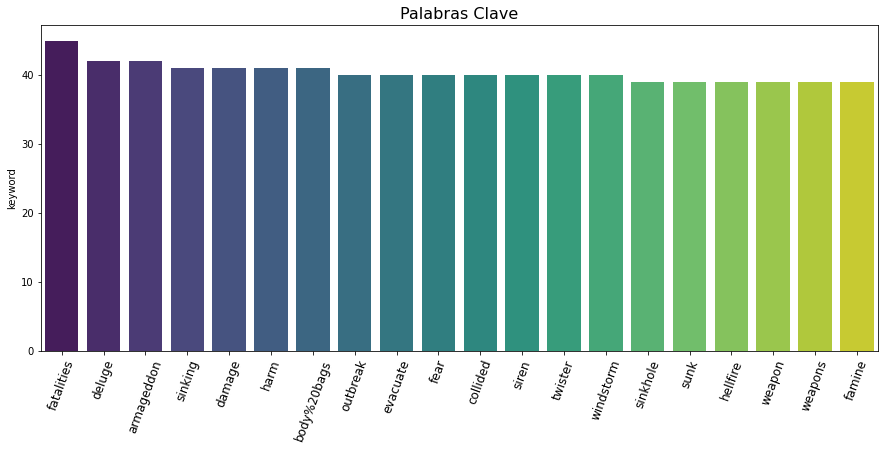

In [58]:
common_keywords=df["keyword"].value_counts()[:20].to_frame()
fig=plt.figure(figsize=(15,6))
sn.barplot(data=common_keywords,x=common_keywords.index,y="keyword",palette="viridis")
plt.title("Palabras Clave",size=16)
plt.xticks(rotation=70,size=12);

### ¿Qué   palabras   cree   que   le   servirán   para   hacer   un   mejor   modelo   de clasificación?

Observando las gráficas, las palabras clave más comunes son las presentes por lo que cada una de estas podria utilizarse para poder detectar un desastre natural de forma más fácil. Ya que muchas de estas comunmente se utilizan durante desastres, tales como fatalidad, daño, miedo, sirenas, cuerpos en bolsa, entre otras.

### Diagrama donde se mencione un DESASTRE

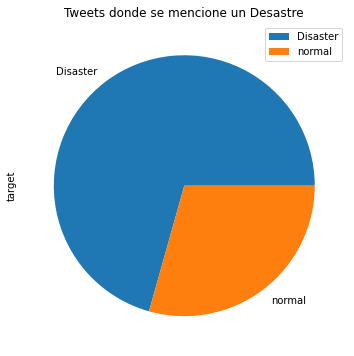

In [60]:
df[df.text.str.contains("disaster")].target.\
 value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).\
  plot.pie(y="target",figsize=(12,6),title="Tweets donde se mencione un Desastre");

### ¿Vale la pena explorar bigramas o trigramas para analizar contexto?

In [ ]:
En este caso el analizar bigramas o trigramas, podremos interpretar más rápido un tweet donde se haga referencia a algun desastre.
El problema de analizar bigramas o trigramas es que omitiremos muchas palabras clave de nuestro listado por lo que seguramente
omitiremos casos de desastre, ya que en el bigrama/trigrama no se encontrarí